# **Part 1: Analyzing wildfire activities in Australia** 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(url)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
df.shape

(26406, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
df.describe()

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count
count,26406.000000,26406.000000,26406.000000,26406.000000,24199.000000,24199.000000,26406.000000
mean,144.297966,319.662078,83.621258,87.574735,7.228302,56.229092,72.059305
std,314.453847,8.862005,67.510022,4.371972,1.995221,25.898935,150.973128
min,1.000000,290.700000,0.000000,76.000000,0.000000,0.000000,1.000000
25%,8.911875,313.933333,44.150391,85.000000,6.687010,44.716106,5.000000
50%,38.434091,319.784412,67.133333,87.771429,7.707025,59.398234,20.000000
75%,146.951278,325.403144,103.123611,90.498403,8.236665,67.842642,74.000000
max,10120.943170,381.950000,2178.600000,100.000000,16.970563,288.000000,3954.000000


In [6]:
import datetime as dt
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [7]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

In [8]:
plt.figure(figsize=(20, 10))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.head()

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
Name: Estimated_fire_area, dtype: float64

<Figure size 2000x1000 with 0 Axes>

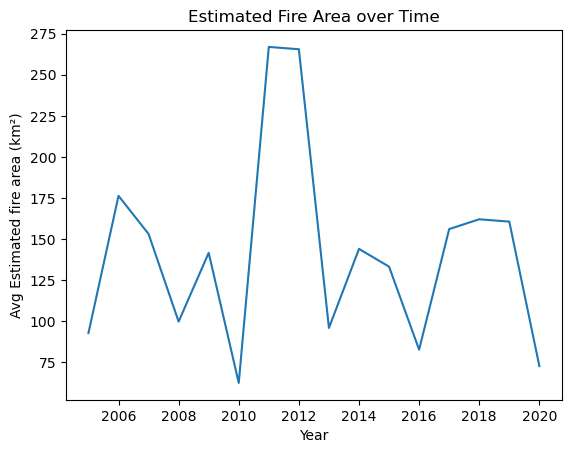

In [9]:
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel("Year")
plt.ylabel("Avg Estimated fire area (km²)")
plt.title("Estimated Fire Area over Time")
plt.show()

In [10]:
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
df_new.head()

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
Name: Estimated_fire_area, dtype: float64

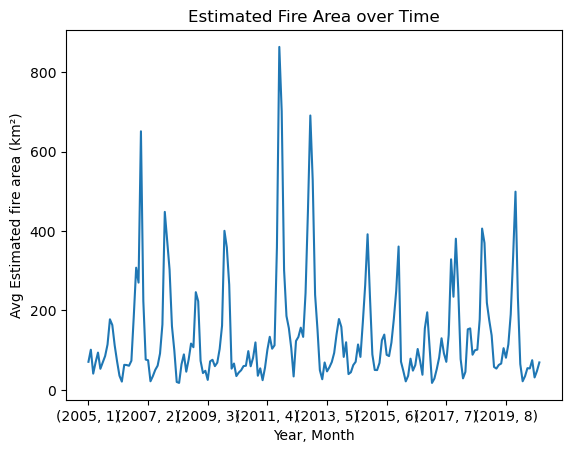

In [11]:
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel("Year, Month")
plt.ylabel("Avg Estimated fire area (km²)")
plt.title("Estimated Fire Area over Time")
plt.show()

In [12]:
df['Region'].unique

<bound method Series.unique of 0        NSW
1        NSW
2        NSW
3        NSW
4        NSW
        ... 
26401     WA
26402     WA
26403     WA
26404     WA
26405     WA
Name: Region, Length: 26406, dtype: object>

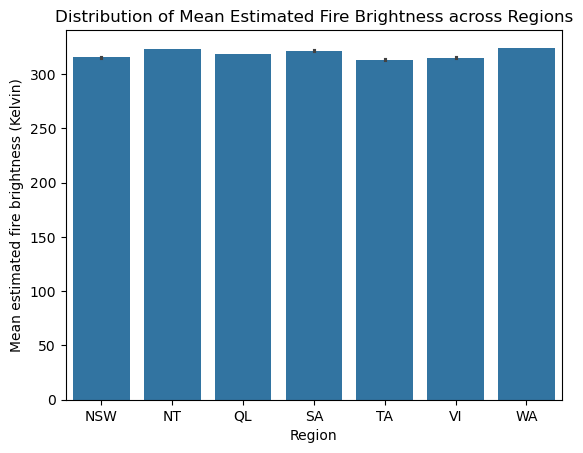

In [13]:
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean estimated fire brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

In [50]:
region_counts = df.groupby("Region")['Count'].sum()
region_counts.head()

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
Name: Count, dtype: int64

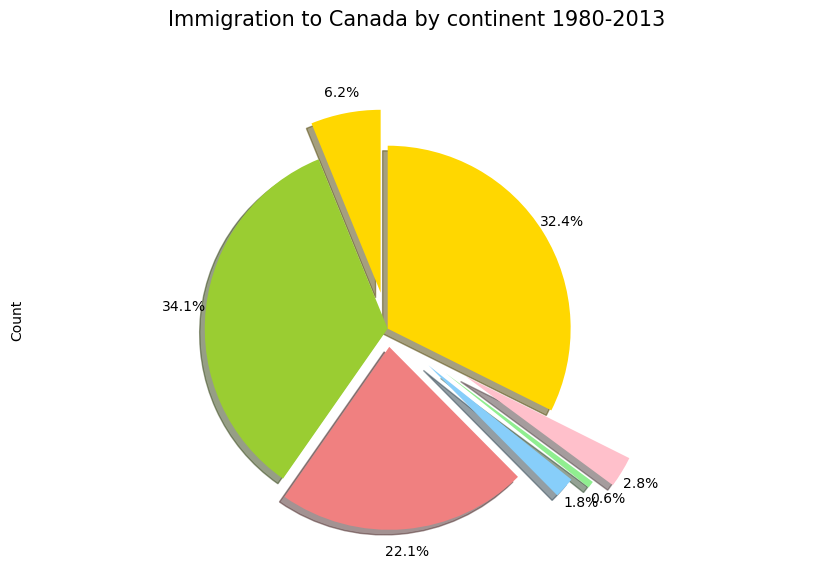

In [53]:
explode_list = [0.2, 0.0, 0.1, 0.3, 0.4, 0.5, 0.0]
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
region_counts.plot(
    kind='pie',
    figsize=(10, 6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    labels = None,
    pctdistance=1.12,
    colors=colors_list,
    explode=explode_list
)
plt.title("Immigration to Canada by continent 1980-2013", y=1.12, fontsize=15)
plt.axis('equal')
# plt.legend(labels=region_counts.index, loc='upper left', fontsize=7)
plt.show()

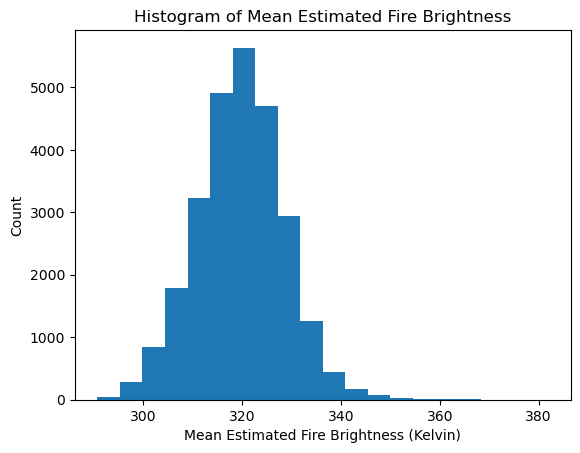

In [54]:
plt.hist(x= df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

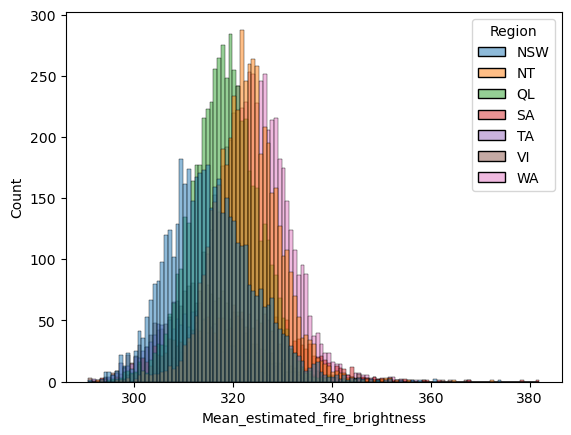

In [55]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

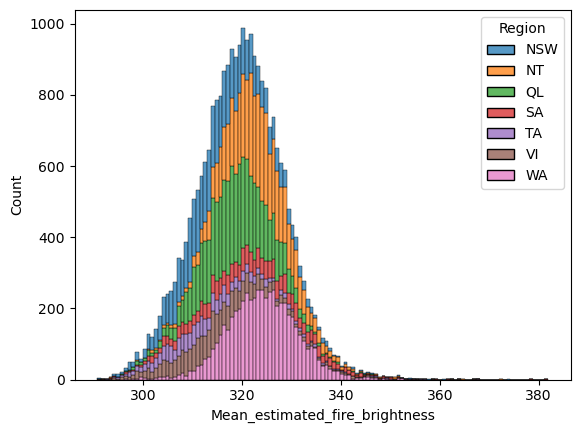

In [56]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

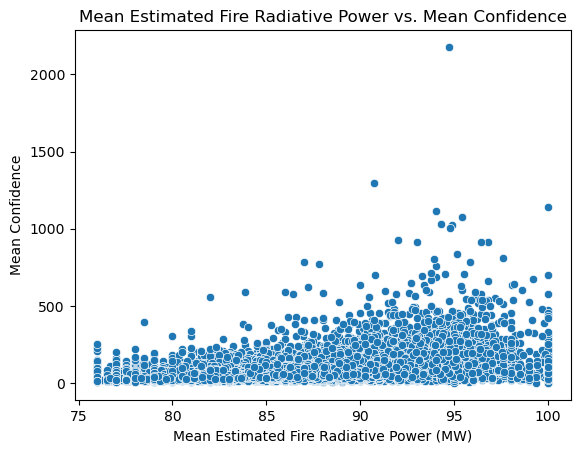

In [57]:
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [58]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [60]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)